# Logistic Regression example

In [1]:
# Data manipulation
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Model implementation
from sklearn.linear_model import LogisticRegression

# Load data (from a dataset in sklearn)
from sklearn.datasets import fetch_california_housing

# Model analysis
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report

# Save models into a file
import pickle

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Obtain data
data = fetch_california_housing()

# See what can we do
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [3]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df["median_house_value"] = data.target
df["median_house_value_larger_than3"] = (df["median_house_value"] > 3).astype(int)

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value,median_house_value_larger_than3
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,1
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1


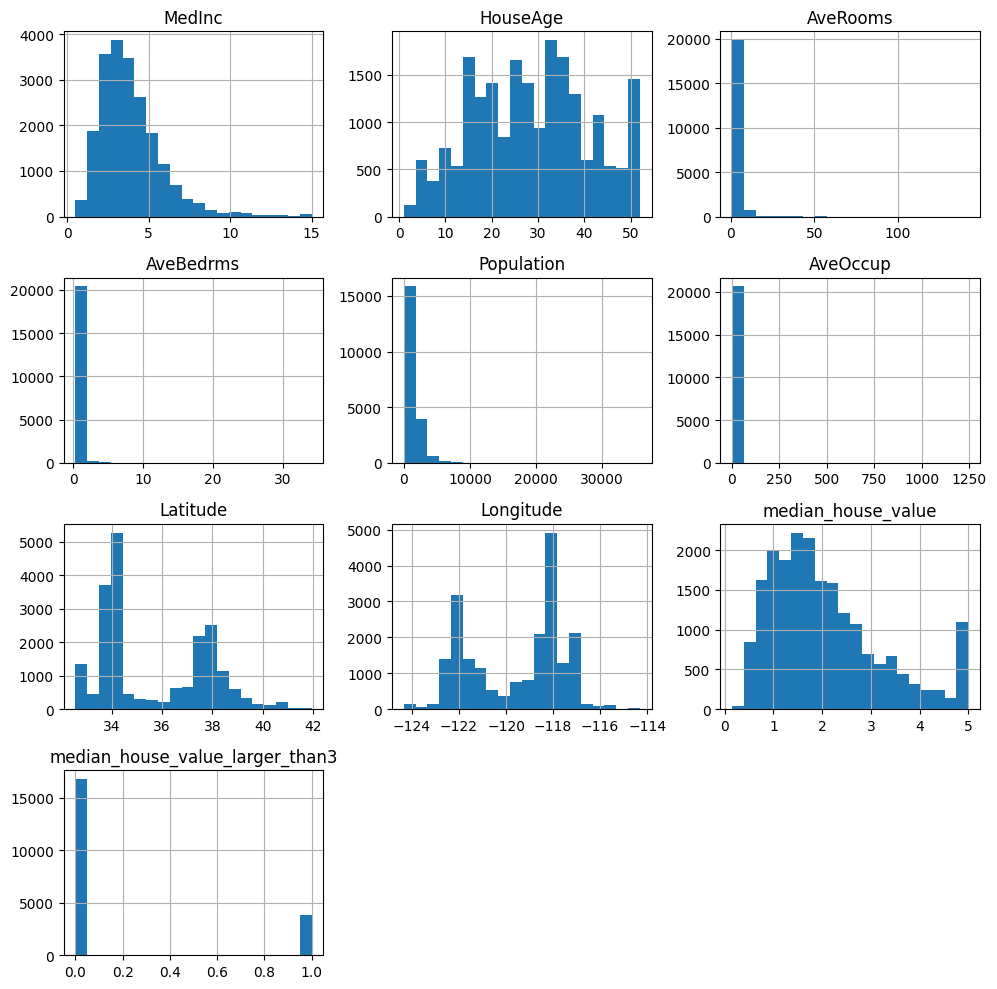

In [4]:
df.hist(bins=20, figsize=(10,10))
plt.tight_layout()

In [5]:
x = df.drop(["median_house_value_larger_than3"], axis=1)
y = df["median_house_value_larger_than3"]
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.5, stratify=y, random_state=1)

In [6]:
logreg = LogisticRegression(solver="liblinear", max_iter=1000) #class_weight='balanced')
logreg.fit(xtrain, ytrain)

LogisticRegression(max_iter=1000, solver='liblinear')

In [7]:
# Determine the performance of the model with different techniques
predictions = logreg.predict(xtest)

print(f"Accuracy on test set:{round(logreg.score(xtest,ytest),2)}")

Accuracy on test set:0.99


In [8]:
print(classification_report(ytest,predictions ))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      8402
           1       1.00      0.97      0.99      1918

    accuracy                           0.99     10320
   macro avg       1.00      0.99      0.99     10320
weighted avg       0.99      0.99      0.99     10320



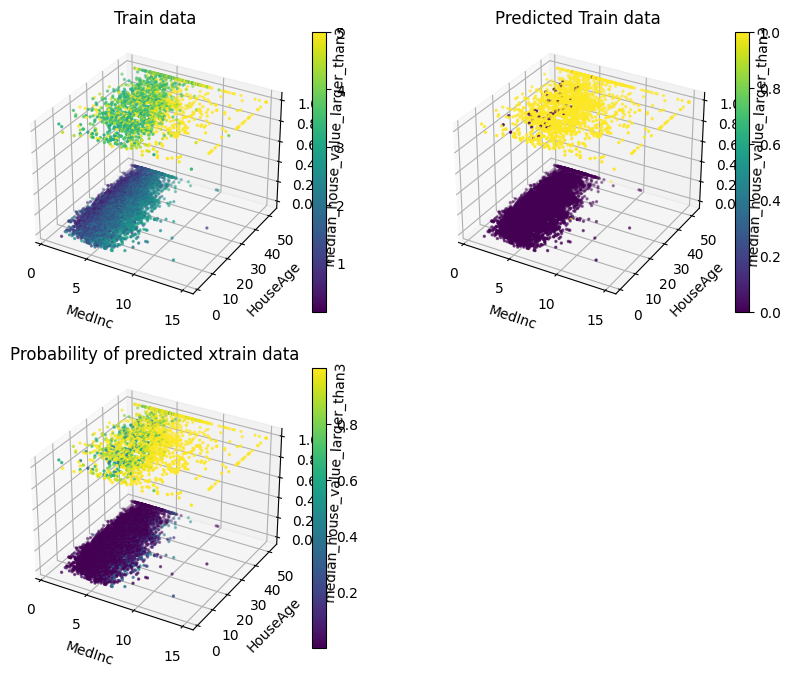

<Figure size 640x480 with 0 Axes>

In [9]:
# 3D visualization
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(221, projection='3d')
p = ax.scatter(xtrain.MedInc, xtrain.HouseAge, ytrain, c=xtrain.median_house_value, s=2)
fig.colorbar(p)
ax.set_xlabel("MedInc")
ax.set_ylabel("HouseAge")
ax.set_zlabel("median_house_value_larger_than3")
plt.title("Train data")

ax = fig.add_subplot(222, projection='3d')
p = ax.scatter(xtrain.MedInc, xtrain.HouseAge, ytrain, c=logreg.predict(xtrain), s=2)
fig.colorbar(p)
ax.set_xlabel("MedInc")
ax.set_ylabel("HouseAge")
ax.set_zlabel("median_house_value_larger_than3")
plt.title("Predicted Train data")

ax = fig.add_subplot(223,projection='3d')
p = ax.scatter(xtrain.MedInc, xtrain.HouseAge, ytrain, c=logreg.predict_proba(xtrain)[:,1], s=2)
fig.colorbar(p)
ax.set_xlabel("MedInc")
ax.set_ylabel("HouseAge")
ax.set_zlabel("median_house_value_larger_than3")
plt.title("Probability of predicted xtrain data")


plt.show()
plt.tight_layout()

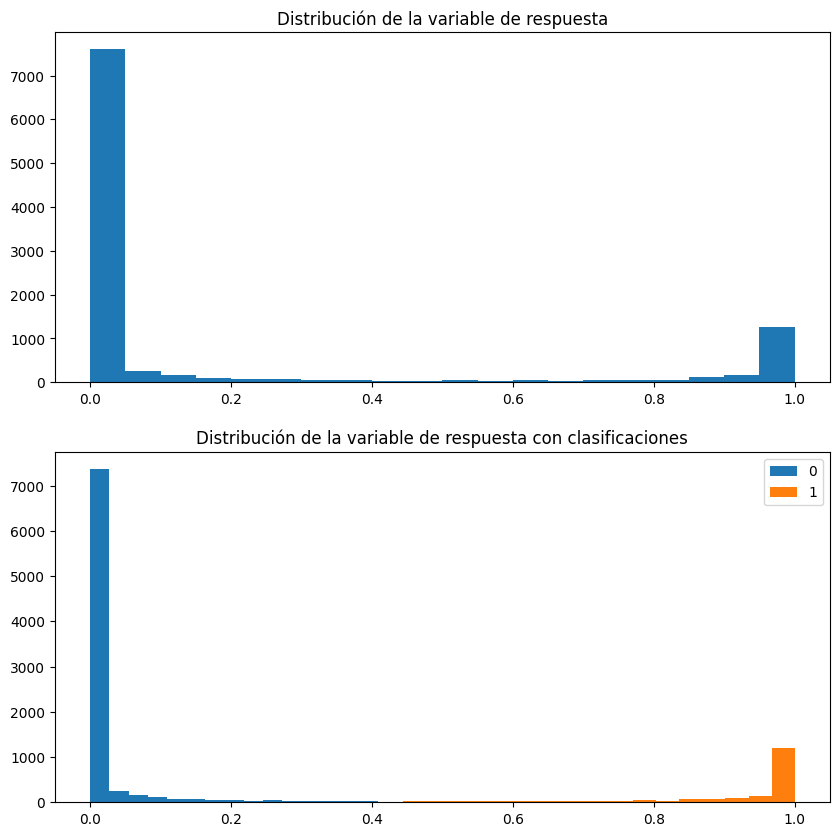

In [10]:
#sns.distplot()
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title('Distribución de la variable de respuesta')
plt.hist(logreg.predict_proba(xtest)[:,1], bins=20)
plt.subplot(212)
plt.title('Distribución de la variable de respuesta con clasificaciones')
plt.hist(logreg.predict_proba(xtest[ytest==0])[:,1], bins=20, label='0')
plt.hist(logreg.predict_proba(xtest[ytest==1])[:,1], bins=20, label='1')
plt.legend()
plt.show()

## Correct Model

In [11]:
x = df.drop(["median_house_value_larger_than3", "median_house_value" ], axis=1)
y = df["median_house_value_larger_than3"]
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.5, stratify=y, random_state=1)

logreg = LogisticRegression(solver="liblinear", max_iter=1000) #class_weight='balanced')
logreg.fit(xtrain, ytrain)

predictions = logreg.predict(xtest)

print(f"Accuracy on test set:{round(logreg.score(xtest,ytest),2)}")

print(classification_report(ytest,predictions ))

Accuracy on test set:0.88
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      8402
           1       0.79      0.48      0.59      1918

    accuracy                           0.88     10320
   macro avg       0.84      0.72      0.76     10320
weighted avg       0.87      0.88      0.87     10320



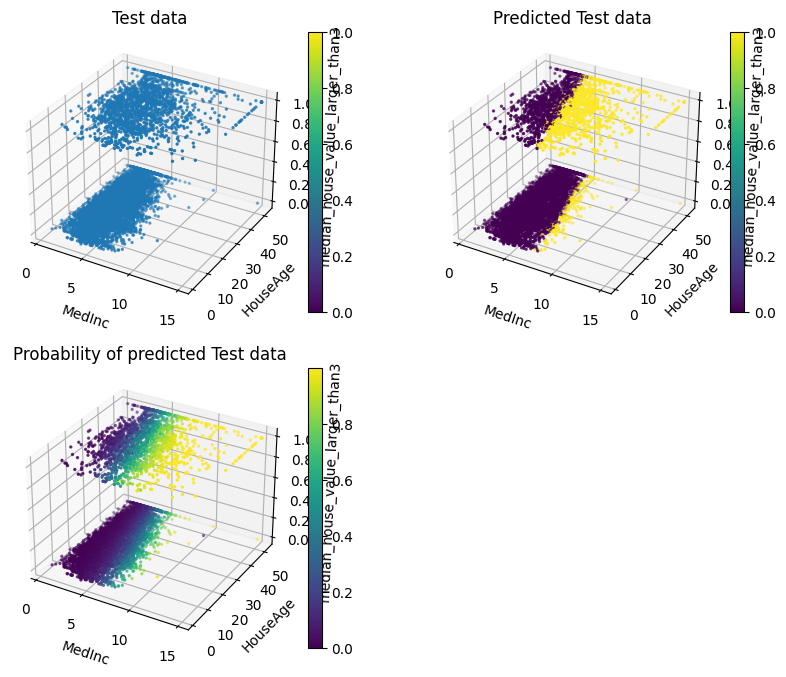

<Figure size 640x480 with 0 Axes>

In [14]:
# 3D visualization
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(221, projection='3d')
p = ax.scatter(xtest.MedInc, xtest.HouseAge, ytest, s=2)
fig.colorbar(p)
ax.set_xlabel("MedInc")
ax.set_ylabel("HouseAge")
ax.set_zlabel("median_house_value_larger_than3")
plt.title("Test data")

ax = fig.add_subplot(222, projection='3d')
p = ax.scatter(xtest.MedInc, xtest.HouseAge, ytest, c=logreg.predict(xtest), s=2)
fig.colorbar(p)
ax.set_xlabel("MedInc")
ax.set_ylabel("HouseAge")
ax.set_zlabel("median_house_value_larger_than3")
plt.title("Predicted Test data")

ax = fig.add_subplot(223,projection='3d')
p = ax.scatter(xtest.MedInc, xtest.HouseAge, ytest, c=logreg.predict_proba(xtest)[:,1], s=2)
fig.colorbar(p)
ax.set_xlabel("MedInc")
ax.set_ylabel("HouseAge")
ax.set_zlabel("median_house_value_larger_than3")
plt.title("Probability of predicted Test data")


plt.show()
plt.tight_layout()

/mnt/c/Users/dhdzm/Documents/proyects/saturdays_ai_gdl4/general_venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/mnt/c/Users/dhdzm/Documents/proyects/saturdays_ai_gdl4/general_venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


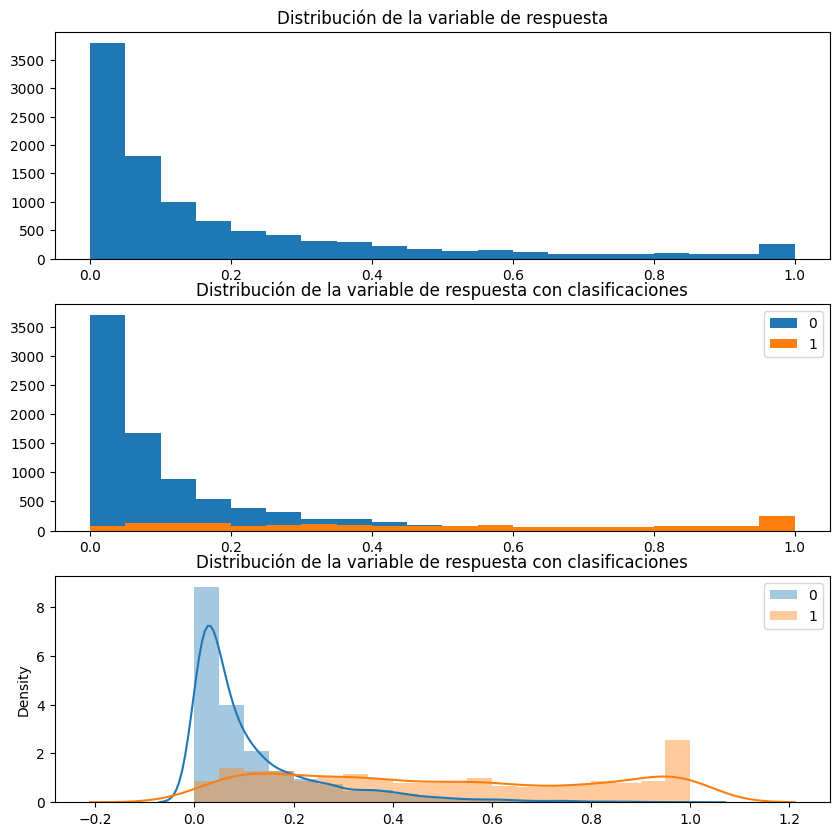

In [17]:
#sns.distplot()
plt.figure(figsize=(10,10))
plt.subplot(311)
plt.title('Distribución de la variable de respuesta')
plt.hist(logreg.predict_proba(xtest)[:,1], bins=20)
plt.subplot(312)
plt.title('Distribución de la variable de respuesta con clasificaciones')
plt.hist(logreg.predict_proba(xtest[ytest==0])[:,1], bins=20, label='0')
plt.hist(logreg.predict_proba(xtest[ytest==1])[:,1], bins=20, label='1')
plt.legend()
plt.subplot(313)
plt.title('Distribución de la variable de respuesta con clasificaciones')
sns.distplot(logreg.predict_proba(xtest[ytest==0])[:,1], bins=20, label='0')
sns.distplot(logreg.predict_proba(xtest[ytest==1])[:,1], bins=20, label='1')
plt.legend()
plt.show()
plt.show()